M504 Individual Final Project

Supermarket Sales Exploratory Data Analysis

Student ID: GH1019250

# Introduction

The company Hkakabo Supermarkets from Myanmar has contacted us about their business questions regarding their sales in their branches in three different cities: Yangon, Naypyitaw and Mandalay. The biggest supermarket chain Hkakabo, has the data of their sales between 01.01.2019-30.03.2019. The data has the following information:

Invoice id: Generated slip invoice number                                          __*object*__\
Branch: Branch of supercenter as A, B and C.                                       __*object*__\
City: Where the supercenters located                                               __*object*__\
Customer type: Information about a customer is member or not                       __*object*__\
Gender: Gender of the customer                                                     __*object*__\
Product line: Categories of purchased items                                        __*object*__\
Unit price: Unit price of a product                                                __*float64*__\
Quantity: Number of products purchased by customer                                 __*int64*__\
Tax: 5% tax fee of purchasement                                                    __*float64*__\
Total: Total price of purchasement                                                 __*float64*__\
Date: Date of purchasement (January 2019-March 2019)                               __*object*__\
Time: Time of purchasement (10:00-21:00)                                           __*object*__\
Payment: Method of payment used in purchasement (Cash, Credit Card or E-Wallet)    __*object*__\
COGS: Cost of goods sold                                                           __*float64*__\
Gross margin percentage: Gross margin percentage                                   __*float64*__\
Gross income: Gross income                                                         __*float64*__\
Rating: Customer rating according to their shopping experience(1-10)               __*float64*__

As the consultant our main purpose is to answer Hkakabo's business questions according to their data and lead them for better solutions.

Note: You can reach the dataset from the following link: https://www.kaggle.com/aungpyaeap/supermarket-sales

# Building the Pipeline

## Loading the Libraries

To start creating our pipeline, we have to import our libraries which we are going to use during our data exploration. We are going to use some general libraries like pandas, numpy and some other libraries for visualization purposes like seaborn and matplotlib.

In [19]:
#Importing Main Libraries
import pandas as pd
import numpy as np

#Importing Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Importing Calendar
import calendar

## Importing the Dataset

In this step, we are going to import our supermarket sales dataset as a .csv file and have a brief information the structure of it.

In [20]:
ssales = pd.read_csv ('supermarket_sales - Sheet1.csv')
print(f'Dimensions of the Dataset {ssales.shape}')
ssales.head()

Dimensions of the Dataset (1000, 17)


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## Starting to know about the dataset

To see the information about features, data types and non-null data counts for each feature, we are using info() method. And also describe() method gives us a mathematical description of our dataset.

In [21]:
ssales.info()
ssales.describe().round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,55.67,5.51,15.38,322.97,307.59,4.76,15.38,6.97
std,26.49,2.92,11.71,245.89,234.18,0.00,11.71,1.72
min,10.08,1.00,0.51,10.68,10.17,4.76,0.51,4.00
25%,32.88,3.00,5.92,124.42,118.50,4.76,5.92,5.50
50%,55.23,5.00,12.09,253.85,241.76,4.76,12.09,7.00
75%,77.94,8.00,22.45,471.35,448.90,4.76,22.45,8.50
max,99.96,10.00,49.65,1042.65,993.00,4.76,49.65,10.00


In the first table, we can see that we have 1000 different entries in our dataset, and none of the features has a NaN value.

Also we can see that, Date and Time features are in object format. We will fix it to datetime format of Pandas Library.

The second one shows us, our data has logical values. We can see the information about minimum and maximum values of our features, their average, standard deviation etc.

# Getting the Data Ready for Exploration

## Correcting Data Types

Here, we are going to change our Date and Time data types from Object to DateTime format. For this purpose, we are going to create new columns for each information we want, using Pandas to_datetime().

In [22]:
ssales['Date'] = pd.to_datetime(ssales['Date'])
ssales['Day'] = (ssales['Date']).dt.day
ssales['Month'] = (ssales['Date']).dt.month
ssales['Year'] = (ssales['Date']).dt.year
ssales['Weekday'] = (ssales['Date']).dt.weekday

ssales['Time'] = pd.to_datetime(ssales['Time'])
ssales['Hour'] = (ssales['Time']).dt.hour
ssales['Minute'] = (ssales['Time']).dt.minute

## Checking Object Values

Our dataset has some object datatype features. We want to see what are the values that our objects can have. 

In [23]:
objects = [col for col in ssales.columns
           if ssales[col].dtype == 'object']

for x in objects[1:]:
  print(f'{ssales[x].unique()}')

['A' 'C' 'B']
['Yangon' 'Naypyitaw' 'Mandalay']
['Member' 'Normal']
['Female' 'Male']
['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']
['Ewallet' 'Cash' 'Credit card']


## Checking Repetitive Features

Some of our features seems to keep the same value for each datapoint. We are going to check if it is true and accordingly, we can drop this features from our dataframe or keep them.

In [24]:
print(ssales['gross margin percentage'].unique())
print(ssales['Year'].unique())
ssales.isnull().sum()

[4.76190476]
[2019]


Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Day                        0
Month                      0
Year                       0
Weekday                    0
Hour                       0
Minute                     0
dtype: int64

We can see that our Year and Gross Margin Percentage keep their value the same for all datapoints. Also, in the second table we are crosschecking our dataset for null values. Since we do not have any null values, we can continue with the next step.

## Dropping the Unnecessary Features

Some of the Features in our dataset are useless for us. We will drop this features to have a clear vision on our dataset. The features that we are going to drop are as follows:

Invoice ID: We do not need this information.\
Branch: The branches are just representetive letters for cities. Since we have city information already, we do not need a repetition.\
Tax %5: The 5% is constant for each datapoint. We can calculate it, if necessary.\
Date: We have all the information in day, month and year format. \
Time: We have all the information in hour and minute format.\
Year: Year has the same value of 2019 for every datapoint.\
Gross Margin Percentage: Gross Margin Percentage also has the same value for each datapoint. Instead we will create a global variable, incase of any need.

In [25]:
ssales = ssales.drop(['Invoice ID', 'Branch', 'Tax 5%',
                      'Date', 'Time', 'Year',
                      'gross margin percentage'], axis=1)
gmp = 4.761905 #global variable

ssales.head()

,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Payment,cogs,gross income,Rating,Day,Month,Weekday,Hour,Minute
0,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,Ewallet,522.83,26.1415,9.1,5,1,5,13,8
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,Cash,76.40,3.8200,9.6,8,3,4,10,29
2,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,Credit card,324.31,16.2155,7.4,3,3,6,13,23
3,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,Ewallet,465.76,23.2880,8.4,27,1,6,20,33
4,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,Ewallet,604.17,30.2085,5.3,8,2,4,10,37


After dropping the unnecessary features, our dataset is ready for exploratory data analysis with the preview above.

# Business Questions & Data Exploration

Hkabako Supermarkets has the following questions regarding their data. 

1- Is there a relationship between rush hours (10:00-12:00 and 16:00-18:00) and total sales?\
2- Which payment method is preferred mostly?\
3- Which weekday has the most sales on average and which weekday has the peak total sales?\
4- Which product line do customers with membership prefer mostly?\
5- Which product line has the most profitable product in terms of gross income per unit?\
6- Which city has better ratings in top 25 ratings?\
7- What are the relationship between the features?\
8- How is the sale totals for each product line, according to the months?

## Is there a relationship between rush hours (10:00-12:00 and 16:00-18:00) and total sales?

To answer this question, we are going to divide our ssales according to the time intervals. For this purpose, we are going to create a for loop, which will check all of the sales and will collect the total sales value according to the hour it has been sold.

In [26]:
total_10_12 = 0
total_12_14 = 0
total_14_16 = 0
total_16_18 = 0
total_18_20 = 0

for x in range(len(ssales)):
    if ssales['Hour'][x] == 10 or ssales['Hour'][x] == 11:
        total_10_12 += ssales['Total'][x]
    elif ssales['Hour'][x] == 12 or ssales['Hour'][x] == 13:
        total_12_14 += ssales['Total'][x]
    elif ssales['Hour'][x] == 14 or ssales['Hour'][x] == 15:
        total_14_16 += ssales['Total'][x]
    elif ssales['Hour'][x] == 16 or ssales['Hour'][x] == 17:
        total_16_18 += ssales['Total'][x]
    elif ssales['Hour'][x] == 18 or ssales['Hour'][x] == 19:
        total_18_20 += ssales['Total'][x]

print(f'The total sales between 10:00 and 12:00 is: {round(total_10_12,2)} \n\
The total sales between 12:00 and 14:00 is: {round(total_12_14,2)} \n\
The total sales between 14:00 and 16:00 is: {round(total_14_16,2)} \n\
The total sales between 16:00 and 18:00 is: {round(total_16_18,2)} \n\
The total sales between 18:00 and 20:00 is: {round(total_18_20,2)}')

The total sales between 10:00 and 12:00 is: 61798.81 
The total sales between 12:00 and 14:00 is: 60789.11 
The total sales between 14:00 and 16:00 is: 62007.91 
The total sales between 16:00 and 18:00 is: 49671.54 
The total sales between 18:00 and 20:00 is: 65729.85


The biggest total sales made between 18:00-20:00 so we can say just after the afternoon rush hour, we have our best sales. On the other hand during the afternoon rush hour, we have our lowest sale total.

## Which payment method is preferred mostly?

We are going to group our dataset according to Payment Methods and we will check for the size of each method. We are going to use groupby() and size() for this purposes.

In [42]:
ssales.groupby('Payment').size()

Payment
Cash           344
Credit card    311
Ewallet        345
dtype: int64

Our customers seem to use different payment methods in a similar rate. Cash and Ewallet prefered mostly, but also credit card usage count is close to them.

## Which weekday has the most quantity sold on average and which weekday has the peak total sales?

To check the most quantity sold on average, we are going to calculate average by collecting all of the quantities according to weekdays and then we will divide it by how many purchasements have been done. Afterwards, we are going to find the max average and by using day_name from calendar, we are going to print our results.

For the second part of the question, first we are going to find the position of the max total sale value. To reach the position of the data with maximum total, we are going to use index method. After getting the index, we are going to use it's index to take the information from dataset.

In [28]:
avg_quantity = ssales.groupby('Weekday').sum()['Quantity'] / ssales.groupby('Weekday').count()['Quantity']
avg_quantity = round(avg_quantity,2)

index_of_max = ssales[ssales["Total"] == max(ssales["Total"])].index[0]

print(f'The weekday with the most quantities sold on avarage is \
{calendar.day_name[avg_quantity[avg_quantity == max(avg_quantity)].index[0]]} \
with the average value of {max(avg_quantity)}.')

print(f'The weekday with the peak total sales is \
{calendar.day_name[ssales["Weekday"][index_of_max]]} \
on {ssales["Day"][index_of_max]}.{ssales["Month"][index_of_max]}.2019 with the value of {max(ssales["Total"])}.')

The weekday with the most quantities sold on avarage is Sunday with the average value of 5.85.
The weekday with the peak total sales is Friday on 15.2.2019 with the value of 1042.65.


On Sunday, we have our best average with 5.85. So this means our customers are buying more items on Sundays. 

And our peak sale is on a Friday, on 15.02.2019 with a total of 1042.65.

## Which product line do customers with membership prefer mostly?

We are going to create a new dataframe, which contains information of customers only who has membership. After having our new dataframe, we are going to group the data according to Product Line and check for the size for each line. Then we will represent our results in a pie chart with percentages.

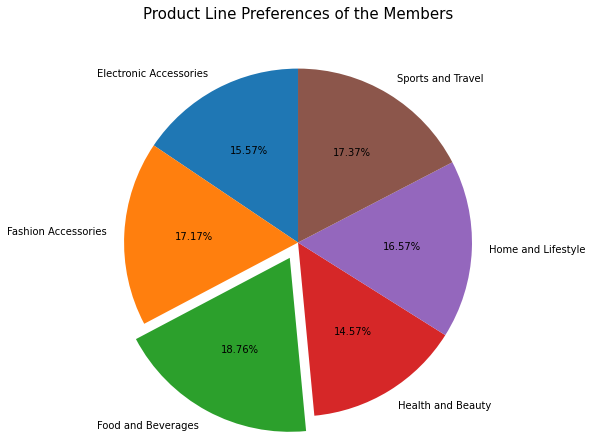

In [43]:
ssales_members = ssales[ssales['Customer type'] == 'Member']
ssales_members = ssales_members.groupby('Product line').size()

plot_labels = ['Electronic Accessories', 'Fashion Accessories', 'Food and Beverages', \
               'Health and Beauty', 'Home and Lifestyle', 'Sports and Travel']
colors = sns.color_palette("tab10")
explode = (0, 0, 0.2, 0, 0, 0)

plt.title('Product Line Preferences of the Members', fontsize=15, y=1.5)
plt.pie(ssales_members, explode=explode, labels=plot_labels, colors=colors, radius=2, autopct='%.2f%%', startangle=90)
plt.show()

After seperating our customers according to customers with membership and normal customers, we can see that our customers with membership mostly preferred Food and Beverages product line with a 18.76 percentage. Sports and Travel and Fashion Accessories are following it.

## Which product line has the most profitable product in terms of gross income per unit?

In our dataset we do not have information about gross income per unit. But we have information of gross income and quantity values for each datapoint. By using this two values and divide from numpy library, we are going to create a new column which will carry the information of gross income per unit. Then we will find the position of the data with max gross income per unit with index. Finally we are going to represent the information by reaching the row with the maximum gross income per unit with iloc.

In [36]:
ssales['Gross income per unit'] = np.divide(ssales['gross income'], ssales['Quantity'])
index_of_max_gross_income = [ssales[ssales['Gross income per unit'] == max(ssales['Gross income per unit'])].index[0]]
max_gross_income_per_unit = ssales.iloc[index_of_max_gross_income]

print(f'The most profitable product in terms of gross income per unit belongs to \
{max_gross_income_per_unit["Product line"].to_string(index=False)} product line, and has a revenue of \
{max_gross_income_per_unit["Gross income per unit"].to_string(index=False)} per unit.')

The most profitable product in terms of gross income per unit belongs to Sports and travel product line, and has a revenue of 4.998 per unit.


Our best product in terms of profitablity has a gross income of nearly 5 per unit. And this product belongs to Sports and Travel product family.

## Which city has better ratings in top 25 ratings?

To reach top 25 ratings, we are going to sort our dataset according to the ratings. Our values will be sorted from 10 to 0 in a descending order. After sorting our data, we are going to use head() to check top 25 scores and we will check for how many of these ratings belongs to each city by grouping the data according to city and checking for the sizes. 

In [44]:
ssales_sorted = ssales.sort_values(by=['Rating'], ascending=False)
ssales_sorted.head(25).groupby('City').size()

City
Mandalay     10
Naypyitaw     5
Yangon       10
dtype: int64

When we sort our dataset according to the ratings descending, we can see the top 25 customer satisfactory ratings. In the 3rd place, Naypyitaw has the lowest with only 5 scores. On the other hand 1st place is shared between Mandalay and Yangon with a equal score of 10 ratings in top 25.

## What is the relationship between the features?

First, we are going to create a dataframe to save the correlation values in, by using DataFrame from pandas library. We are going to select the datatype of this frame as float since correlation results are going to be in float type. Afterwards, we are going to calculate correlation between each feature by using corr() method. We are going to represent our results with a heat map which will make it easier to read.

<AxesSubplot:>

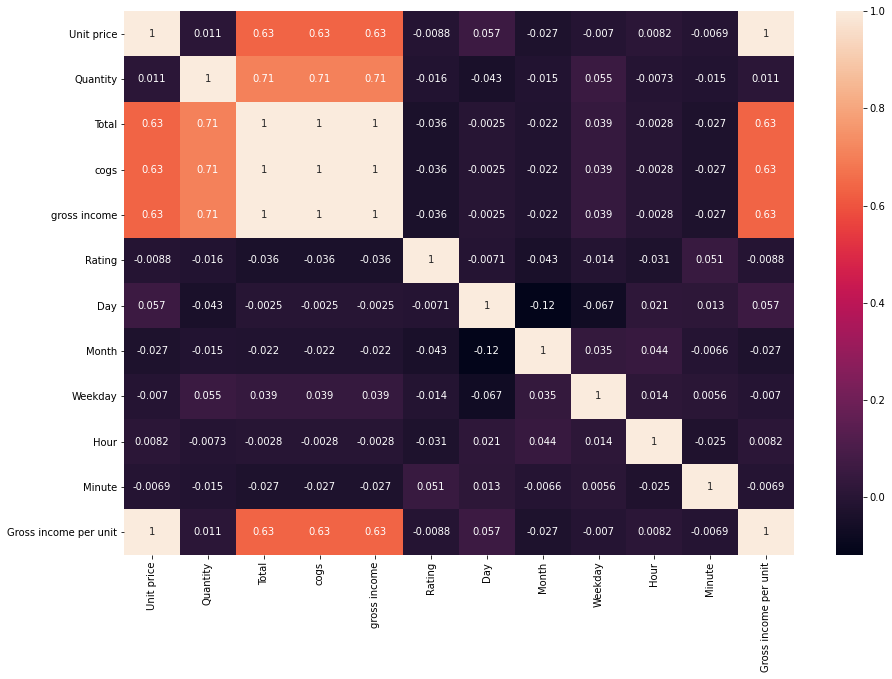

In [32]:
correlation = pd.DataFrame(dtype='float')
correlation = ssales.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation, annot=True)

In the heatmap we can see that some of our features are correlated with each other with high scores. But when we go into the detail, we can see that they are correlated because they are depending on each other with the formulations. For example:

"Total" = "Unit Price" * "Quantity" + "Tax 5%", or\
"Total" = "cogs" + "gross income"

When we consider this relations, we cannot see any other correlation in our dataset.

## Which product line has the highest sale total, in one purchasement, for each month?

To answer this question, we are going to use catplot, which will help us to compare three different features in the same visual. Our inputs will be product line, total and month to catplot and we are going to see every total value according to the product line with a different color representation of the month. Then we are going to check peak values from the visual we have.

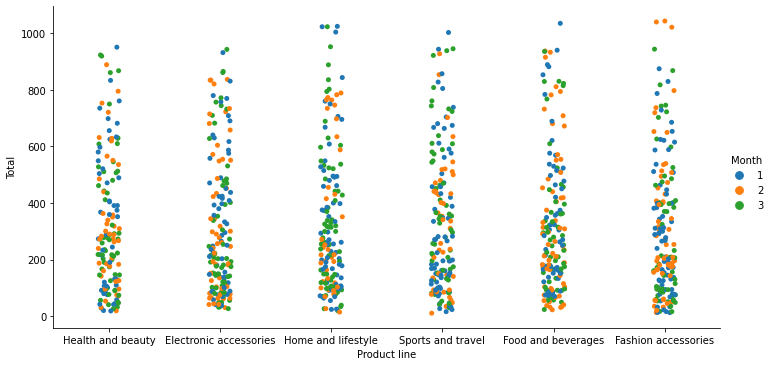

In [33]:
sns.catplot(x='Product line', y='Total', hue='Month', data=ssales, aspect=2)

In our plot, we can see the total values for each purchasement with the information of month and product line. 

According to the graph, 1st month the largest purchasement was on Food and beverages. On the other hand, there are 3 different purchasements which are close to the maximum one in home and lifestyle section.

Fashion and accessories has the lead in the second month with three different purchasements in the same product line.

In the 3rd month, Home and lifestyle has the peak total.

# Discussion and Conclusion

Our questions and results show that, we have our best sales between 18:00-20:00, and the worst between 16:00-18:00. According to this information, Hkabako can give break time to their employees before 18:00. We can also see that our customers are more likely to buy more items on Sundays and has spent the most money in a Friday.

We also learned that, our customers payment method habits. With this information Hkakabo can program their finance. And now, we know about the habits of our customers with membership. 

Our best product in terms of profitablity belongs to Sports and travel section. And we now know that we should keep track of Food and bevarages, fashion and accessories and home and lifestyle sections, in the 1st, 2nd and 3rd months respectively, since they have the top sales. 

Our customers seem to be satisfied by their shopping experience in Mandalay and Yangon, but on the other hand our branch in Naypyitaw should improve their ratings. For this purpose, Hkakabo can train their staff members in Naypyitaw branch.

Our exploratory data analysis is completed, and we answered Hkabako Supermarkets' business questions. According to our results, we now know much more about our customers habbits and preferences. Our customer Hkabako Supermarkets now can act accordingly to improve their sales, their customer satisfactory according to our analysis. And also, now they can change their stock numbers according to the analysis. 

As far as our analysis took us, now Hkabako can make better decisions in their business cases. With the improvements in their business and by collecting more data will keep them improving more and more. After a while, their data will become available for prediction cases. But for this purposes, and further analysis, we need more data about sales.